In [52]:
#import neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
covid_dataset = pd.read_csv("Datasets/covid19_Confirmed_dataset.csv")
covid_dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [54]:
covid_dataset_dimension = covid_dataset.shape
covid_dataset_dimension

(266, 104)

In [55]:
updated_dataset = covid_dataset.drop(["Lat","Long"],axis=1)
updated_dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [56]:
updated_dataset= updated_dataset.groupby("Country/Region").sum()
updated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [57]:
updated_dataset.shape

(187, 100)

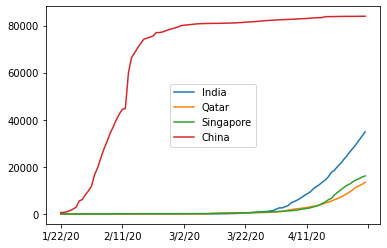

In [58]:
#Visualisation of data of a few countries
updated_dataset.loc["India"].plot()
updated_dataset.loc["Qatar"].plot()
updated_dataset.loc["Singapore"].plot()
updated_dataset.loc["China"].plot()
plt.legend()

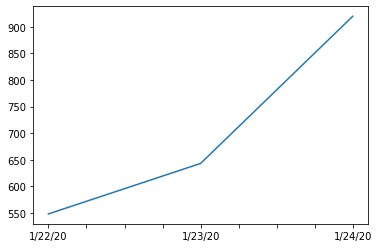

In [59]:
#First 3 days
updated_dataset.loc["China"][:3].plot()

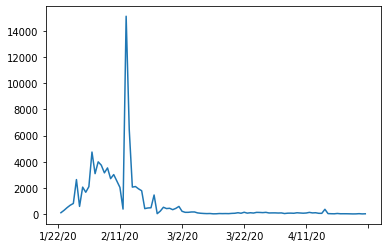

In [60]:
#Change in infection rate
updated_dataset.loc['China'].diff().plot()

In [61]:
#Maximum Increase in a single day for all countries
countries_list = list(updated_dataset.index)
max_increase_in_a_day = []
for c in countries_list:
    max_increase_in_a_day.append( updated_dataset.loc[c].diff().max())

In [66]:
#Append the list into the table
updated_dataset['Maximum_Increase_Rate'] = max_increase_in_a_day
updated_dataset.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum_Increase_Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [67]:
corona_data = pd.DataFrame(updated_dataset['Maximum_Increase_Rate'])
corona_data.head()

,Maximum_Increase_Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [68]:
#Import Data from World Happiness Report
Happiness_Report = pd.read_csv("Datasets/worldwide_happiness_report.csv")
Happiness_Report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [69]:
Happiness_Report.drop(["Perceptions of corruption","Generosity","Overall rank","Score"],axis=1,inplace=True)
Happiness_Report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [70]:
#Make the countries list as index
Happiness_Report.set_index("Country or region",inplace=True)
Happiness_Report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [76]:
#data from both the datsets are combined using Inner Join
combined_data = corona_data.join(Happiness_Report,how="inner")
combined_data.head()

,Maximum_Increase_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [77]:
#A correlation matrix is made to identify the dependencies of various factors on each other
combined_data.corr()

,Maximum_Increase_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum_Increase_Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


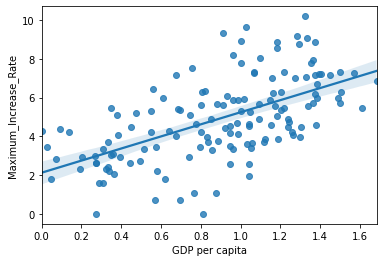

In [79]:
#Visualise the dependencies of Infection Rate with various factors
X1 = combined_data['GDP per capita']
Y1 = combined_data['Maximum_Increase_Rate']
sns.regplot(X1,np.log(Y1))  #Logarithmic Scale is take to visualise the data better

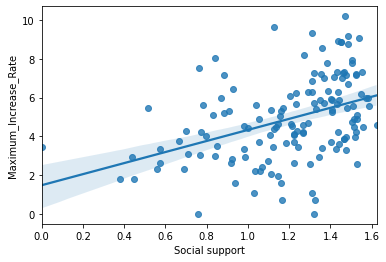

In [80]:
X2 = combined_data['Social support']
Y2 = combined_data['Maximum_Increase_Rate']
sns.regplot(X2,np.log(Y2))

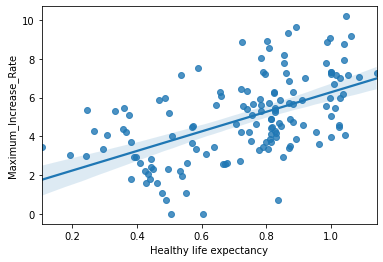

In [81]:
X3 = combined_data['Healthy life expectancy']
Y3 = combined_data['Maximum_Increase_Rate']
sns.regplot(X3,np.log(Y3))

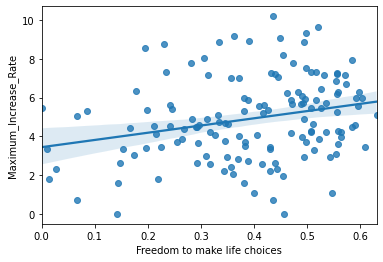

In [82]:
X4 = combined_data['Freedom to make life choices']
Y4 = combined_data['Maximum_Increase_Rate']
sns.regplot(X4,np.log(Y4))